# Utilization of libraries

In [ ]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading of Dataset

In [ ]:
#data=pd.read_csv("./TSCO.L.csv")

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving TSCO.L.csv to TSCO.L.csv


In [ ]:
import io

data = pd.read_csv(io.BytesIO(uploaded['TSCO.L.csv']))

# Overviewing of data

In [ ]:
data

Date        Open        High         Low       Close   Adj Close  \
0     1988-07-01   62.685600   62.685600   62.685600   62.685600   21.576326   
1     1988-07-04   61.456402   61.456402   61.456402   61.456402   21.153236   
2     1988-07-05   62.275902   62.275902   62.275902   62.275902   21.435312   
3     1988-07-06   61.456402   61.456402   61.456402   61.456402   21.153236   
4     1988-07-07   60.227299   60.227299   60.227299   60.227299   20.730188   
...          ...         ...         ...         ...         ...         ...   
9183  2024-04-12  282.600006  286.700012  280.700012  282.899994  282.899994   
9184  2024-04-15  284.100006  287.000000  283.399994  286.299988  286.299988   
9185  2024-04-16  283.700012  285.299011  280.200012  280.799988  280.799988   
9186  2024-04-17  278.899994  283.799988  277.500000  282.200012  282.200012   
9187  2024-04-18  283.799988  285.000000  282.799988  283.630005  283.630005   

          Volume  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
9183  25554004.0  
9184  15873246.0  
9185  58037065.0  
9186  13408288.0  
9187    726643.0  

[9188 rows x 7 columns]

# Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9188 non-null   object 
 1   Open       9187 non-null   float64
 2   High       9187 non-null   float64
 3   Low        9187 non-null   float64
 4   Close      9187 non-null   float64
 5   Adj Close  9187 non-null   float64
 6   Volume     9187 non-null   float64
dtypes: float64(6), object(1)
memory usage: 502.6+ KB


In [ ]:
data.shape

(9188, 7)

In [ ]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  9187.000000  9187.000000  9187.000000  9187.000000  9187.000000   
mean    278.111982   280.900727   275.169257   278.005302   157.562431   
std     139.521234   141.184739   137.744746   139.436947    90.778325   
min      52.852501    52.852501    52.852501    52.852501    18.191788   
25%     153.688797   153.688797   153.688797   153.688797    61.339402   
50%     267.899811   271.573212   264.099792   267.836487   157.599335   
75%     388.391449   392.349792   384.889145   388.866486   238.712723   
max     624.466370   626.049683   614.333008   623.199707   322.340790   

             Volume  
count  9.187000e+03  
mean   2.418344e+07  
std    3.537287e+07  
min    0.000000e+00  
25%    8.743498e+06  
50%    1.692029e+07  
75%    2.710391e+07  
max    8.602839e+08

In [ ]:
data.size

64316

### Checking for Null Values

In [ ]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
data=data.dropna()

# Visualizing Procedure

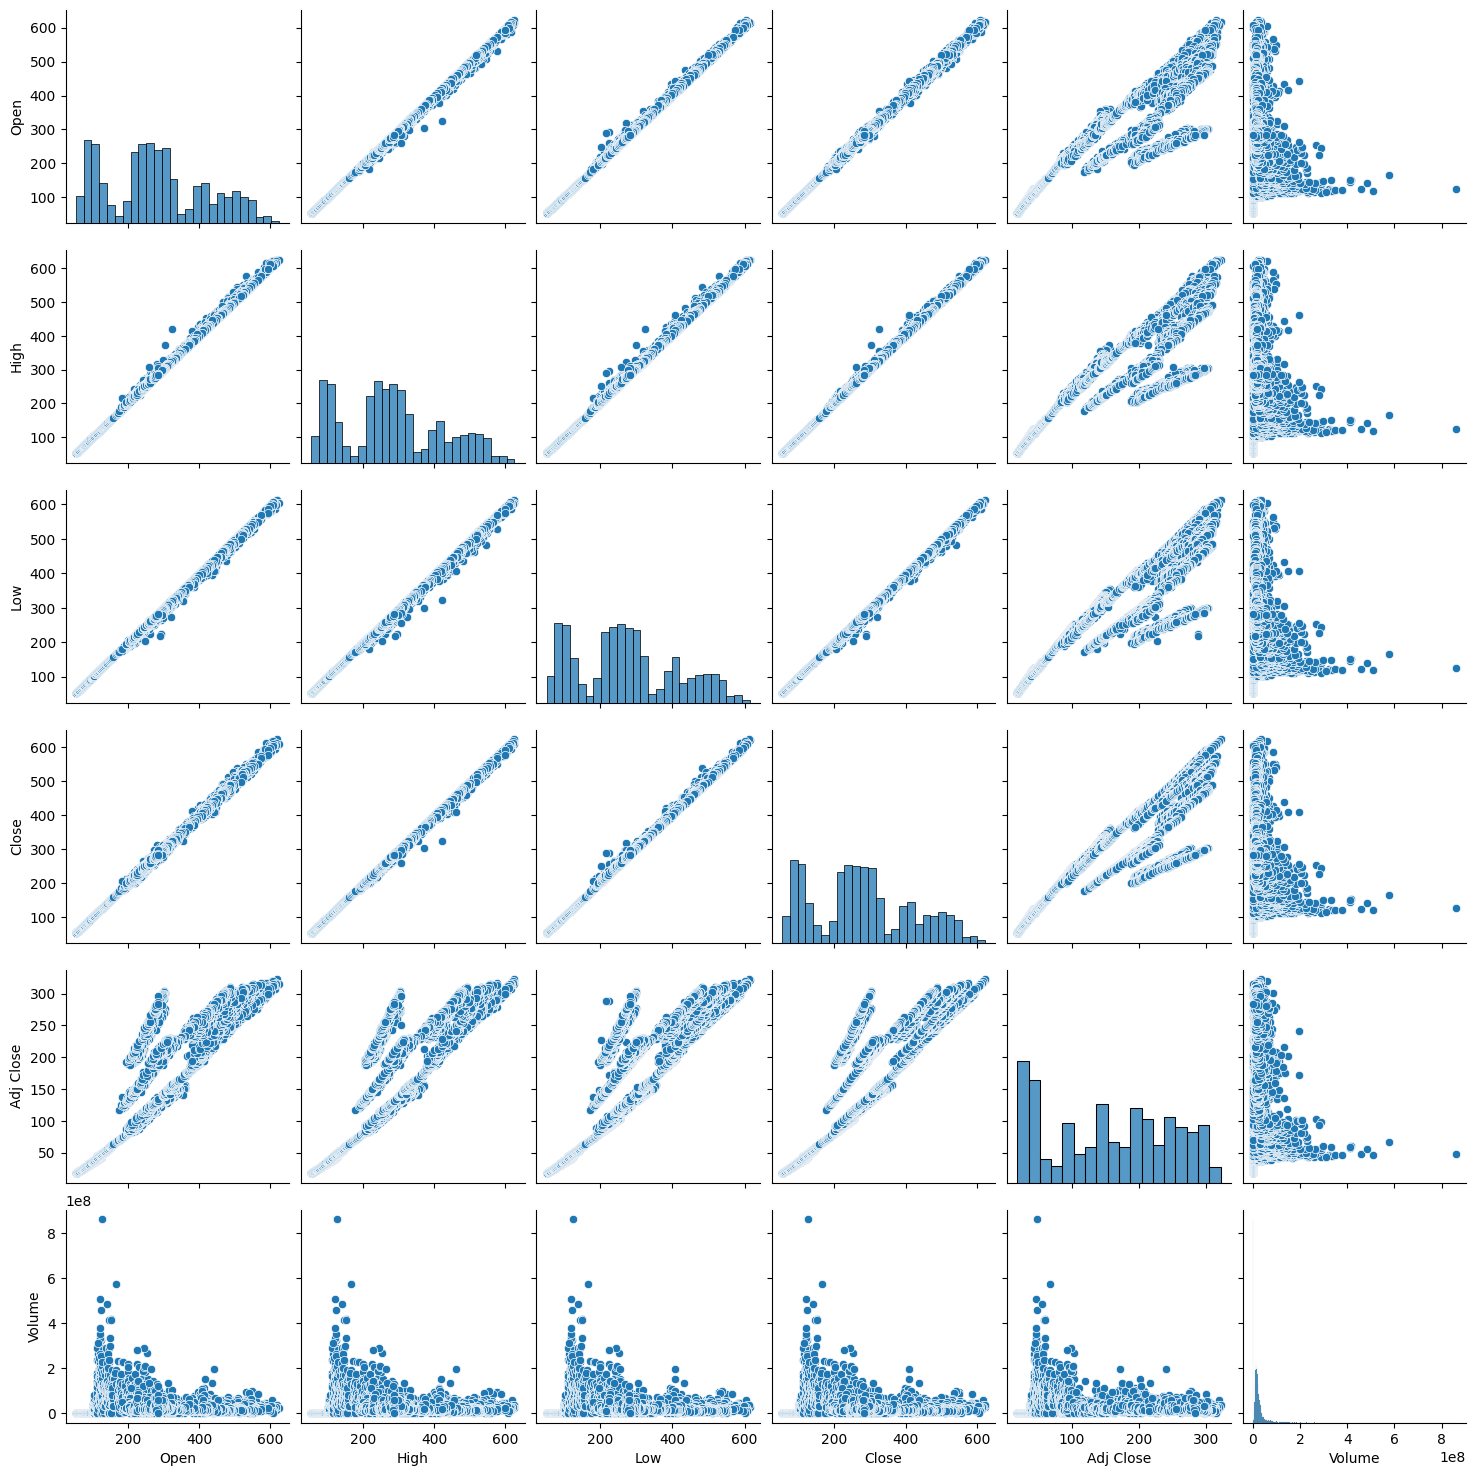

In [ ]:
sns.pairplot(data)

In [ ]:
data.hvplot.hist(by='Volume', subplots=False, width=1000)

:NdOverlay   [Variable]
   :Histogram   [Adj Close]   (Count)

In [ ]:
data.hvplot.scatter(x='Open', y='Volume')

:Scatter   [Open]   (Volume)

# Correletion analysis

<Axes: >

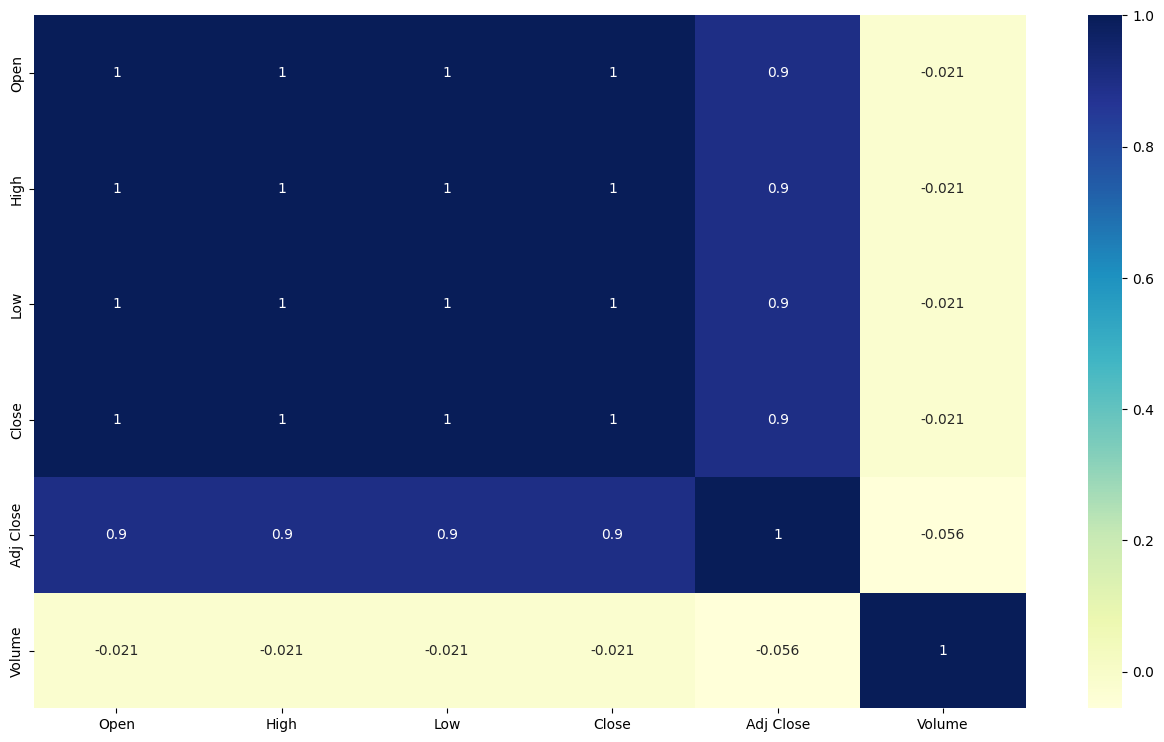

In [ ]:


plt.figure(figsize=(16,9))
sns.heatmap(data.drop(columns=['Date']).corr(), annot = True, cmap="YlGnBu")

# Initialtion of Machine Learning Method

In [ ]:
X = data.drop(["Date", "Volume"],axis=1)
y = data[['Volume']]

## Splitting of Variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Development

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### Model Pipelining and Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('std_scalar', StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Implementing Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lin_reg.intercept_)

[24483553.55209953]


### Predicting data

In [ ]:
pred = lin_reg.predict(X_test)

### Obtaining accuracy of the model

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 18637420.827635296
MSE: 1110304596267396.5
RMSE: 33321233.4145571
R2 Square 0.003586539041609327
__________________________________
Train set evaluation:
_____________________________________
MAE: 18858478.31940705
MSE: 1298101445366772.5
RMSE: 36029174.91931743
R2 Square 0.00867463095180454
__________________________________


### Implementing Robust Regression

In [ ]:
from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor(max_trials=100)
model.fit(X_train, y_train)

RANSACRegressor()

### Prediction of data

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 16491256.153567342
MSE: 1431707574855845.0
RMSE: 37837911.872298725
R2 Square -0.28484805389285506
__________________________________
Train set evaluation:
_____________________________________
MAE: 17186033.3665129
MSE: 1656198762103235.0
RMSE: 40696421.981585
R2 Square -0.26479471609806415
__________________________________


In [ ]:
results_df = pd.concat([results_df,results_df_2], ignore_index=True)
results_df

Model           MAE           MSE          RMSE  R2 Square  \
0  Linear Regression  1.863742e+07  1.110305e+15  3.332123e+07   0.003587   
1  Robust Regression  1.649126e+07  1.431708e+15  3.783791e+07  -0.284848   

   Cross Validation  
0         -2.079760  
1         -0.593059

### Implementing Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)

Ridge(alpha=100, random_state=42, solver='cholesky')

### Prediction of data

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_3 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 18610992.137128167
MSE: 1109232492349623.6
RMSE: 33305142.130752478
R2 Square 0.004548670315141279
__________________________________
Train set evaluation:
_____________________________________
MAE: 18846772.263829205
MSE: 1298689417970677.8
RMSE: 36037333.668997735
R2 Square 0.008225611993666115
__________________________________


In [ ]:
results_df = pd.concat([results_df, results_df_3], ignore_index=True)
results_df

Model           MAE           MSE          RMSE  R2 Square  \
0  Linear Regression  1.863742e+07  1.110305e+15  3.332123e+07   0.003587   
1  Robust Regression  1.649126e+07  1.431708e+15  3.783791e+07  -0.284848   
2   Ridge Regression  1.861099e+07  1.109232e+15  3.330514e+07   0.004549   

   Cross Validation  
0         -2.079760  
1         -0.593059  
2         -2.079759

# Implementing LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1,
              precompute=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

Lasso(alpha=0.1, positive=True, precompute=True, random_state=42,
      selection='random')

### Prediction of data

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df_4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 18600871.465084493
MSE: 1115301168715900.6
RMSE: 33396125.055399776
R2 Square -0.0008975026016302401
__________________________________
Train set evaluation:
_____________________________________
MAE: 18823135.066767123
MSE: 1309460532229819.8
RMSE: 36186468.9107658
R2 Square 0.0
__________________________________


In [ ]:
results_df = pd.concat([results_df, results_df_4], ignore_index=True)
results_df

Model           MAE           MSE          RMSE  R2 Square  \
0  Linear Regression  1.863742e+07  1.110305e+15  3.332123e+07   0.003587   
1  Robust Regression  1.649126e+07  1.431708e+15  3.783791e+07  -0.284848   
2   Ridge Regression  1.861099e+07  1.109232e+15  3.330514e+07   0.004549   
3   Lasso Regression  1.860087e+07  1.115301e+15  3.339613e+07  -0.000898   

   Cross Validation  
0         -2.079760  
1         -0.593059  
2         -2.079759  
3         -2.040341

# Implementing Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

### Prediction of data

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_5 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 18615757.384301364
MSE: 1109213604243402.9
RMSE: 33304858.568133913
R2 Square 0.004565620945944371
__________________________________
Train set evaluation:
_____________________________________
MAE: 18853612.6153758
MSE: 1298640533038377.2
RMSE: 36036655.408602744
R2 Square 0.008262944109523884
__________________________________


In [ ]:
results_df = pd.concat([results_df, results_df_5], ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0       Linear Regression  1.863742e+07  1.110305e+15  3.332123e+07   
1       Robust Regression  1.649126e+07  1.431708e+15  3.783791e+07   
2        Ridge Regression  1.861099e+07  1.109232e+15  3.330514e+07   
3        Lasso Regression  1.860087e+07  1.115301e+15  3.339613e+07   
4  Elastic Net Regression  1.861576e+07  1.109214e+15  3.330486e+07   

   R2 Square  Cross Validation  
0   0.003587         -2.079760  
1  -0.284848         -0.593059  
2   0.004549         -2.079759  
3  -0.000898         -2.040341  
4   0.004566         -2.039621

# Implementing Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, max_iter=100000, n_iter_no_change=250, penalty=None)

### Prediction of data

In [ ]:
test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_6 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 18625410.58390324
MSE: 1109206374195980.8
RMSE: 33304750.02452324
R2 Square 0.0045721093605641805
__________________________________
Train set evaluation:
_____________________________________
MAE: 18865381.10998365
MSE: 1298517844258715.2
RMSE: 36034953.090835504
R2 Square 0.008356638250463844
__________________________________


In [ ]:
results_df = pd.concat([results_df, results_df_6], ignore_index=True)

In [ ]:
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  1.863742e+07  1.110305e+15  3.332123e+07   
1            Robust Regression  1.649126e+07  1.431708e+15  3.783791e+07   
2             Ridge Regression  1.861099e+07  1.109232e+15  3.330514e+07   
3             Lasso Regression  1.860087e+07  1.115301e+15  3.339613e+07   
4       Elastic Net Regression  1.861576e+07  1.109214e+15  3.330486e+07   
5  Stochastic Gradient Descent  1.862541e+07  1.109206e+15  3.330475e+07   

   R2 Square  Cross Validation  
0   0.003587         -2.079760  
1  -0.284848         -0.593059  
2   0.004549         -2.079759  
3  -0.000898         -2.040341  
4   0.004566         -2.039621  
5   0.004572          0.000000

# Implementing Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

### Prediction of data

In [ ]:
test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_7 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 10470066.010095548
MSE: 634885958857027.9
RMSE: 25196943.44274773
R2 Square 0.43023840691526305
__________________________________
Train set evaluation:
_____________________________________
MAE: 5137935.0178569155
MSE: 266572972454908.7
RMSE: 16327062.578887504
R2 Square 0.7964253477720524
__________________________________


In [ ]:
results_df = pd.concat([results_df, results_df_7], ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  1.863742e+07  1.110305e+15  3.332123e+07   
1            Robust Regression  1.649126e+07  1.431708e+15  3.783791e+07   
2             Ridge Regression  1.861099e+07  1.109232e+15  3.330514e+07   
3             Lasso Regression  1.860087e+07  1.115301e+15  3.339613e+07   
4       Elastic Net Regression  1.861576e+07  1.109214e+15  3.330486e+07   
5  Stochastic Gradient Descent  1.862541e+07  1.109206e+15  3.330475e+07   
6      Random Forest Regressor  1.047007e+07  6.348860e+14  2.519694e+07   

   R2 Square  Cross Validation  
0   0.003587         -2.079760  
1  -0.284848         -0.593059  
2   0.004549         -2.079759  
3  -0.000898         -2.040341  
4   0.004566         -2.039621  
5   0.004572          0.000000  
6   0.430238          0.000000

# Implementing Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

SVR(C=1000000, epsilon=0.001)

### Prediction of data

In [ ]:
test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df_8 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 13442106.526101561
MSE: 1170762904325751.8
RMSE: 34216412.79160853
R2 Square -0.050670168693036644
__________________________________
Train set evaluation:
_____________________________________
MAE: 14154493.90360885
MSE: 1404956934621985.2
RMSE: 37482755.16316784
R2 Square -0.07292804940791076
__________________________________


In [ ]:
results_df = pd.concat([results_df, results_df_8], ignore_index=True)

In [ ]:
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  1.863742e+07  1.110305e+15  3.332123e+07   
1            Robust Regression  1.649126e+07  1.431708e+15  3.783791e+07   
2             Ridge Regression  1.861099e+07  1.109232e+15  3.330514e+07   
3             Lasso Regression  1.860087e+07  1.115301e+15  3.339613e+07   
4       Elastic Net Regression  1.861576e+07  1.109214e+15  3.330486e+07   
5  Stochastic Gradient Descent  1.862541e+07  1.109206e+15  3.330475e+07   
6      Random Forest Regressor  1.047007e+07  6.348860e+14  2.519694e+07   
7                SVM Regressor  1.344211e+07  1.170763e+15  3.421641e+07   

   R2 Square  Cross Validation  
0   0.003587         -2.079760  
1  -0.284848         -0.593059  
2   0.004549         -2.079759  
3  -0.000898         -2.040341  
4   0.004566         -2.039621  
5   0.004572          0.000000  
6   0.430238          0.000000  
7  -0.050670          0.000000

# Implementing Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

LinearRegression()

In [ ]:
test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_9 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 17764046.531514548
MSE: 1009702100340589.2
RMSE: 31775809.987167742
R2 Square 0.09386958522954114
__________________________________
Train set evaluation:
_____________________________________
MAE: 17945138.226869773
MSE: 1186792681799600.2
RMSE: 34449857.50042517
R2 Square 0.09367815784515032
__________________________________


In [ ]:
results_df = pd.concat([results_df, results_df_9], ignore_index=True)

In [ ]:
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  1.863742e+07  1.110305e+15  3.332123e+07   
1            Robust Regression  1.649126e+07  1.431708e+15  3.783791e+07   
2             Ridge Regression  1.861099e+07  1.109232e+15  3.330514e+07   
3             Lasso Regression  1.860087e+07  1.115301e+15  3.339613e+07   
4       Elastic Net Regression  1.861576e+07  1.109214e+15  3.330486e+07   
5  Stochastic Gradient Descent  1.862541e+07  1.109206e+15  3.330475e+07   
6      Random Forest Regressor  1.047007e+07  6.348860e+14  2.519694e+07   
7                SVM Regressor  1.344211e+07  1.170763e+15  3.421641e+07   
8        Polynomail Regression  1.776405e+07  1.009702e+15  3.177581e+07   

   R2 Square  Cross Validation  
0   0.003587         -2.079760  
1  -0.284848         -0.593059  
2   0.004549         -2.079759  
3  -0.000898         -2.040341  
4   0.004566         -2.039621  
5   0.004572          0.000000  
6   0.430238          0.000000  
7  -0.050670          0.000000  
8   0.093870          0.000000

# Implementing Artficial Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

In [ ]:
r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=10)

Epoch 1/10
6430/6430 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 2045263560572928.0000 - val_loss: 1665772732547072.0000
Epoch 2/10
6430/6430 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 1963630459355136.0000 - val_loss: 1665709650214912.0000
Epoch 3/10
6430/6430 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 1789479601831936.0000 - val_loss: 1665419471486976.0000
Epoch 4/10
6430/6430 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 1992562030149632.0000 - val_loss: 1664486926712832.0000
Epoch 5/10
6430/6430 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 2034798738538496.0000 - val_loss: 1662146035318784.0000
Epoch 6/10
6430/6430 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 1746433963196416.0000 - val_loss: 1657111528341504.0000
Epoch 7/10
6430/6430 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 1855259844542464.0000 - val_loss: 1647435101241344.0000
Epoch 8/10
6430/6430 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 1919710123786240.0000 - val_loss: 1631003495890944.0000
Epoch 9/10
6430/6430 ━━━━━━━━━━━━━━━━━━━━ 20s 3m

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_10 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 21640329.309688974
MSE: 1569125627368545.8
RMSE: 39612190.38842142
R2 Square -0.4081702465259891
__________________________________
Train set evaluation:
_____________________________________
MAE: 22562332.642534994
MSE: 1808860692080157.2
RMSE: 42530702.93423513
R2 Square -0.38137855060047654
__________________________________


In [ ]:
results_df = pd.concat([results_df, results_df_10], ignore_index=True)

In [ ]:
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  1.863742e+07  1.110305e+15  3.332123e+07   
1            Robust Regression  1.649126e+07  1.431708e+15  3.783791e+07   
2             Ridge Regression  1.861099e+07  1.109232e+15  3.330514e+07   
3             Lasso Regression  1.860087e+07  1.115301e+15  3.339613e+07   
4       Elastic Net Regression  1.861576e+07  1.109214e+15  3.330486e+07   
5  Stochastic Gradient Descent  1.862541e+07  1.109206e+15  3.330475e+07   
6      Random Forest Regressor  1.047007e+07  6.348860e+14  2.519694e+07   
7                SVM Regressor  1.344211e+07  1.170763e+15  3.421641e+07   
8        Polynomail Regression  1.776405e+07  1.009702e+15  3.177581e+07   
9     Artficial Neural Network  2.164033e+07  1.569126e+15  3.961219e+07   

   R2 Square  Cross Validation  
0   0.003587         -2.079760  
1  -0.284848         -0.593059  
2   0.004549         -2.079759  
3  -0.000898         -2.040341  
4   0.004566         -2.039621  
5   0.004572          0.000000  
6   0.430238          0.000000  
7  -0.050670          0.000000  
8   0.093870          0.000000  
9  -0.408170          0.000000

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['R2 Square'].plot(kind='hist', bins=20, title='R2 Square')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='MAE', y='MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='MSE', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='RMSE', y='R2 Square', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='R2 Square', y='Cross Validation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['R2 Square'].plot(kind='line', figsize=(8, 4), title='R2 Square')
plt.gca().spines[['top', 'right']].set_visible(False)

# Implementing Stats Model

In [ ]:
import statsmodels.api as sm
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.255
Model:                            OLS   Adj. R-squared (uncentered):              0.254
Method:                 Least Squares   F-statistic:                              628.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):                        0.00
Time:                        12:37:09   Log-Likelihood:                     -1.7313e+05
No. Observations:                9187   AIC:                                  3.463e+05
Df Residuals:                    9182   BIC:                                  3.463e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
res.params

Open        -156072.021055
High         -84082.179752
Low          310338.996253
Close         56759.380481
Adj Close    -95045.887366
dtype: float64

In [ ]:
res.rsquared

0.25484859580146113

# Implementing Exponential Weighted Moving Average

In [ ]:
close=data['Adj Close']
close.index=pd.to_datetime(close.index)
close

1970-01-01 00:00:00.000000000     21.576326
1970-01-01 00:00:00.000000001     21.153236
1970-01-01 00:00:00.000000002     21.435312
1970-01-01 00:00:00.000000003     21.153236
1970-01-01 00:00:00.000000004     20.730188
                                    ...    
1970-01-01 00:00:00.000009183    282.899994
1970-01-01 00:00:00.000009184    286.299988
1970-01-01 00:00:00.000009185    280.799988
1970-01-01 00:00:00.000009186    282.200012
1970-01-01 00:00:00.000009187    283.630005
Name: Adj Close, Length: 9187, dtype: float64

<Axes: >

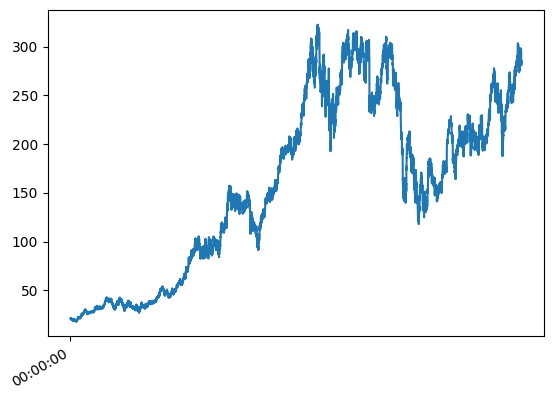

In [ ]:
close.plot()

In [ ]:
ema_50 = close.ewm(span=50,adjust=False).mean()
ema_50

1970-01-01 00:00:00.000000000     21.576326
1970-01-01 00:00:00.000000001     21.559734
1970-01-01 00:00:00.000000002     21.554855
1970-01-01 00:00:00.000000003     21.539105
1970-01-01 00:00:00.000000004     21.507383
                                    ...    
1970-01-01 00:00:00.000009183    287.536254
1970-01-01 00:00:00.000009184    287.487773
1970-01-01 00:00:00.000009185    287.225507
1970-01-01 00:00:00.000009186    287.028428
1970-01-01 00:00:00.000009187    286.895157
Name: Adj Close, Length: 9187, dtype: float64

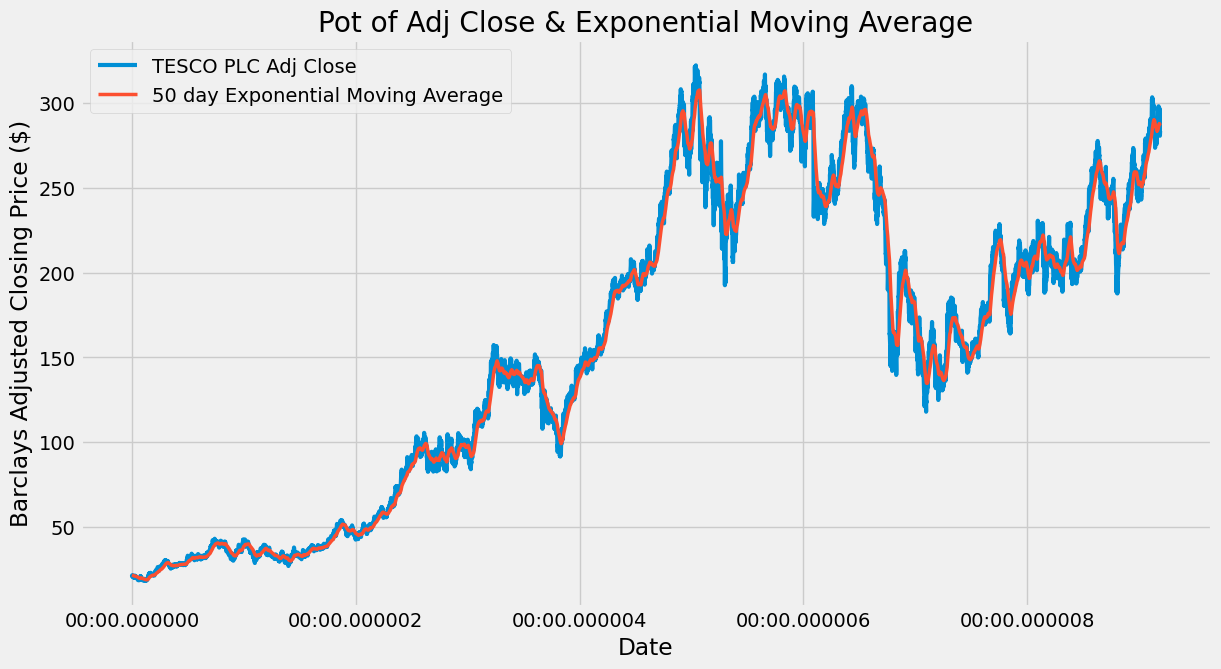

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (13,7))
plt.plot(close,label='TESCO PLC Adj Close',linewidth=3)
plt.plot(ema_50,label='50 day Exponential Moving Average',linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Barclays Adjusted Closing Price ($)')
plt.title('Pot of Adj Close & Exponential Moving Average')
plt.legend()

# Implementing Autoregressive Integrated Moving Average (ARIMA)

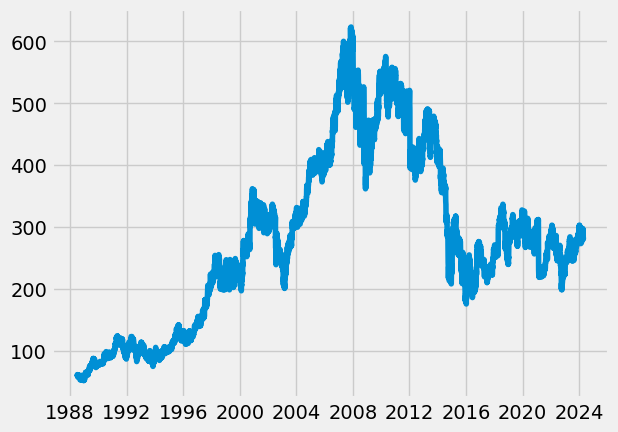

In [ ]:
import datetime as dt

x = [dt.datetime.strptime(d,"%Y-%m-%d").date() for d in data["Date"]]
y = data["Close"]

plt.plot(x,y)
plt.show()

# Implementing Capital Assets Pricing Model (CAPM)

<Axes: >

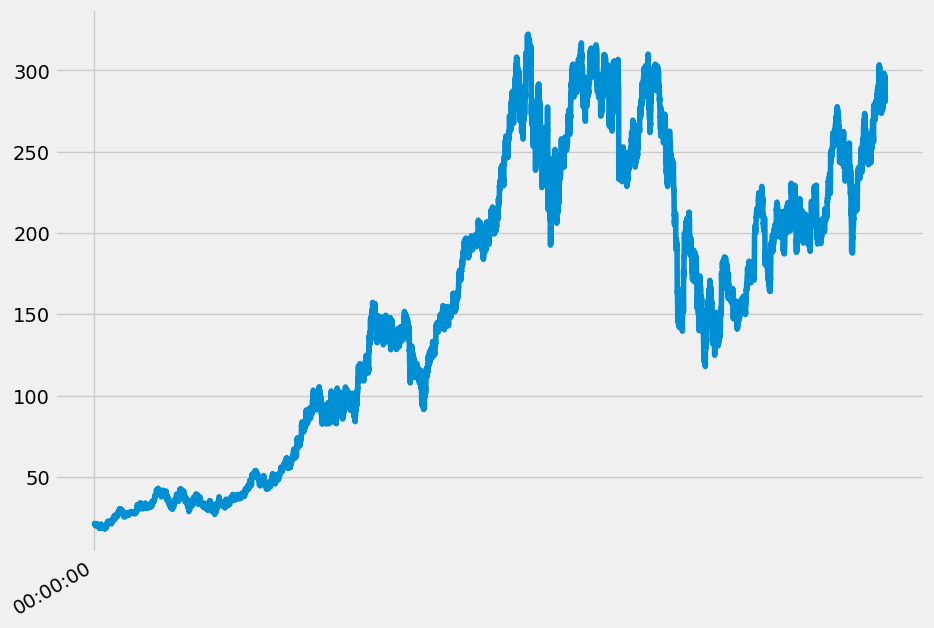

In [ ]:
data['Adj Close'].plot(label= 'TESCO PLC', figsize= (10,8))

# Implementing Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF)

In [ ]:
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

<Figure size 640x480 with 0 Axes>

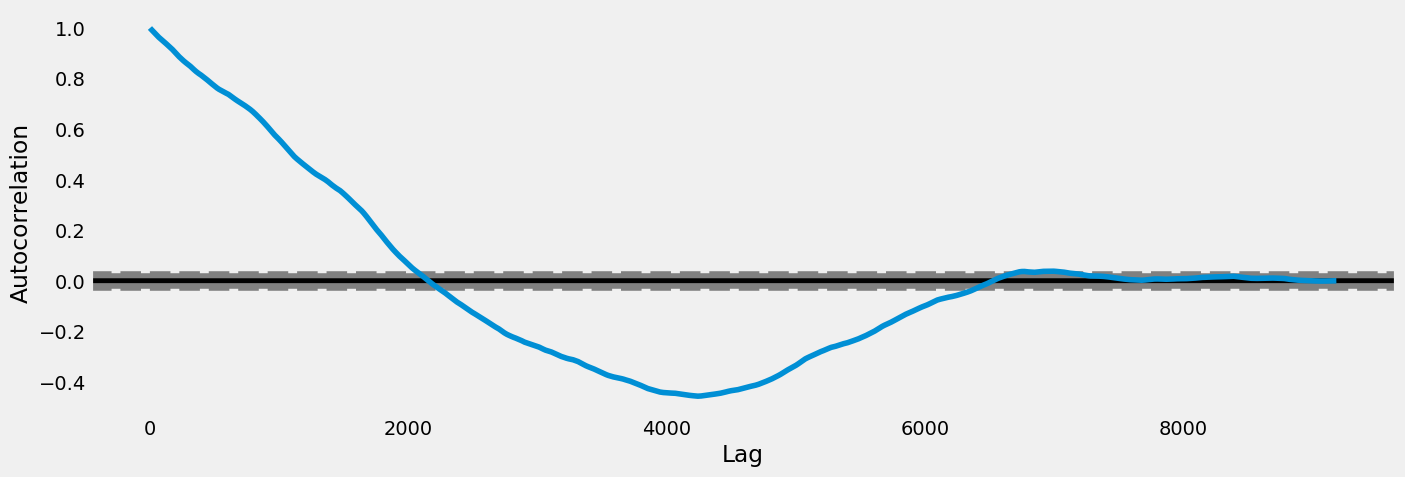

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 5))
autocorrelation_plot(data['Close'], ax=ax)

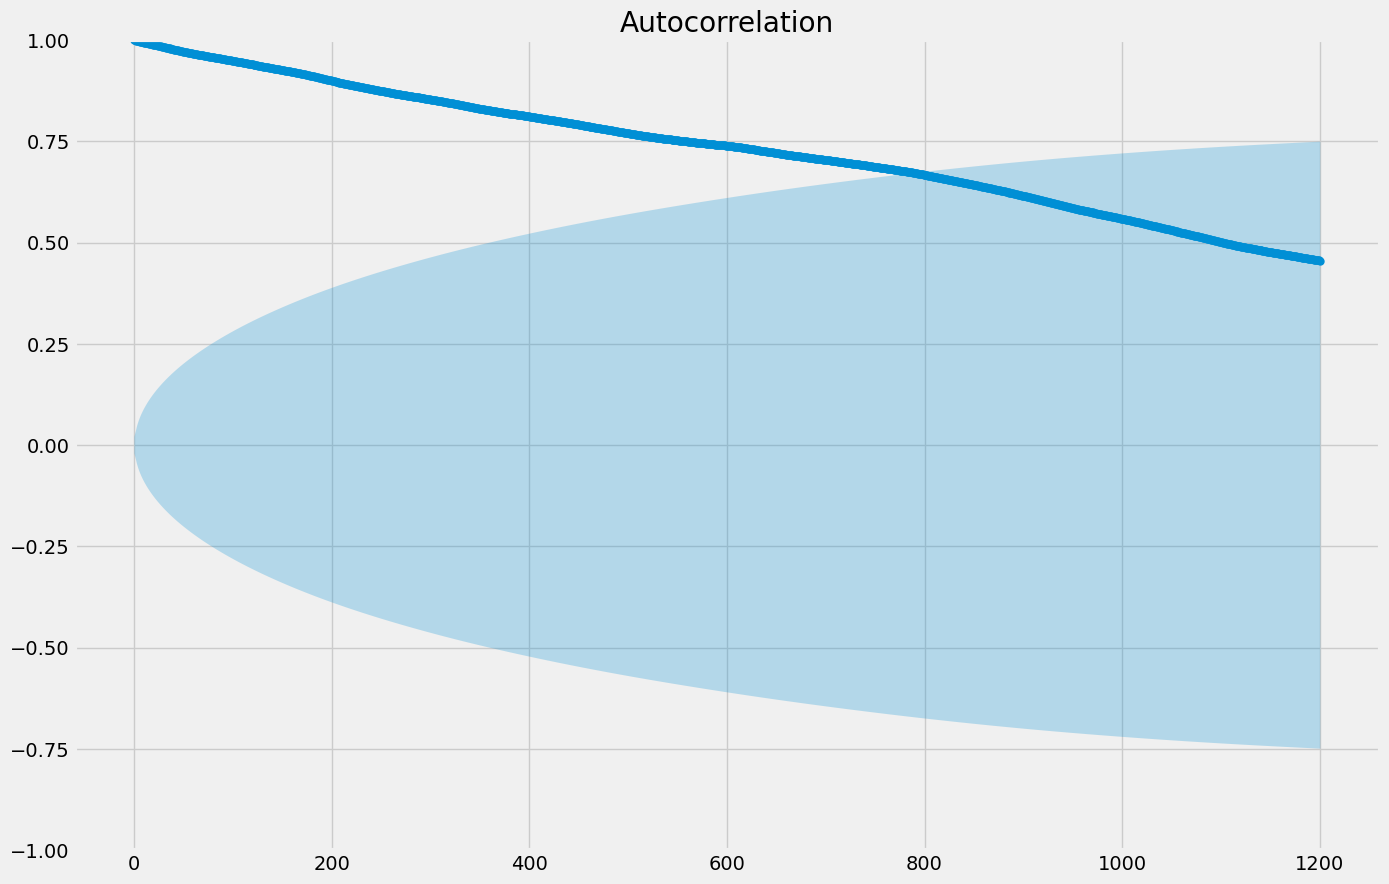

<Figure size 640x480 with 0 Axes>

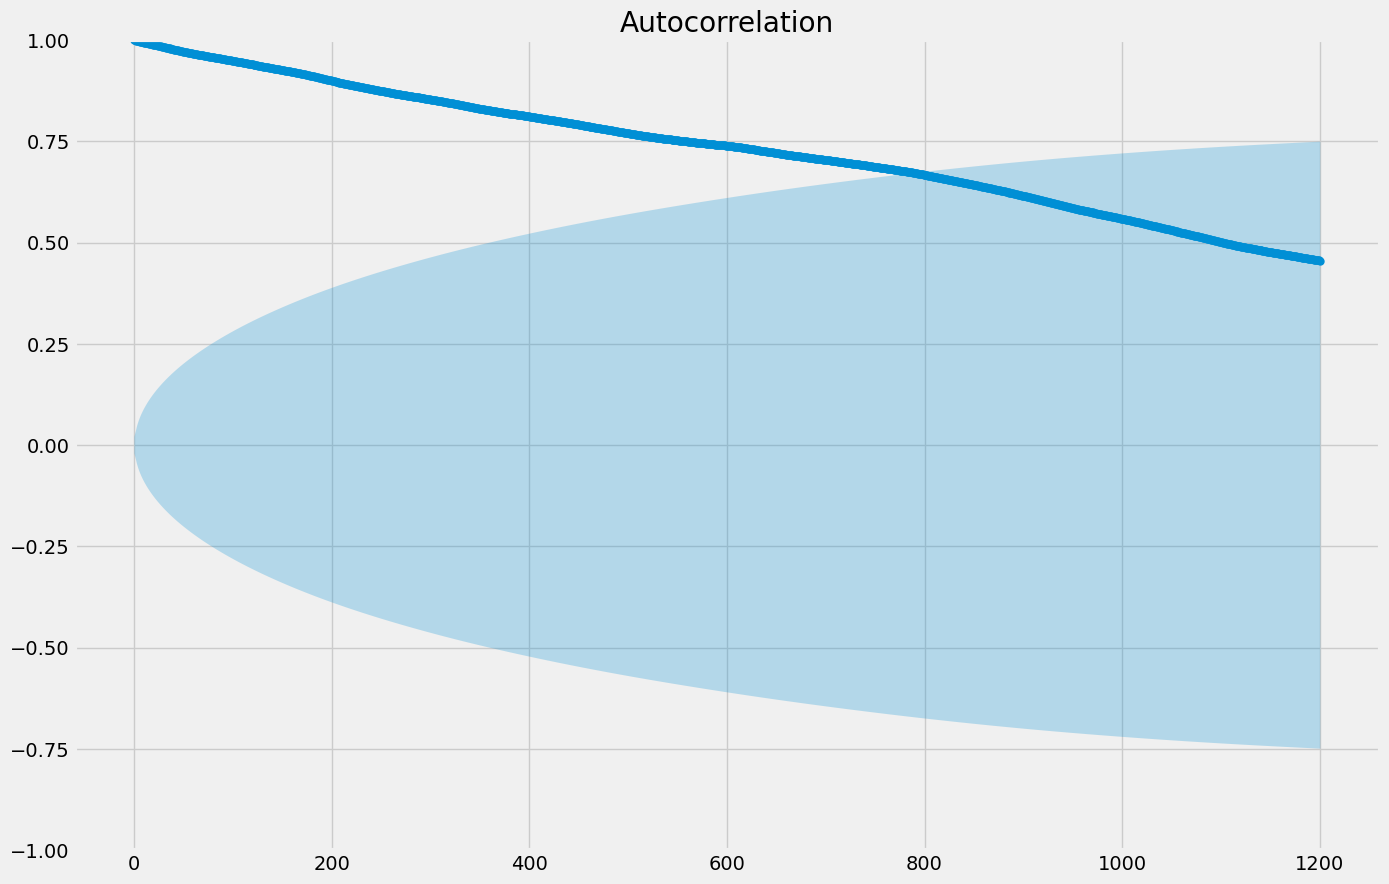

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 10))
plot_acf(data['Close'], lags=1200, use_vlines=False, ax=ax)

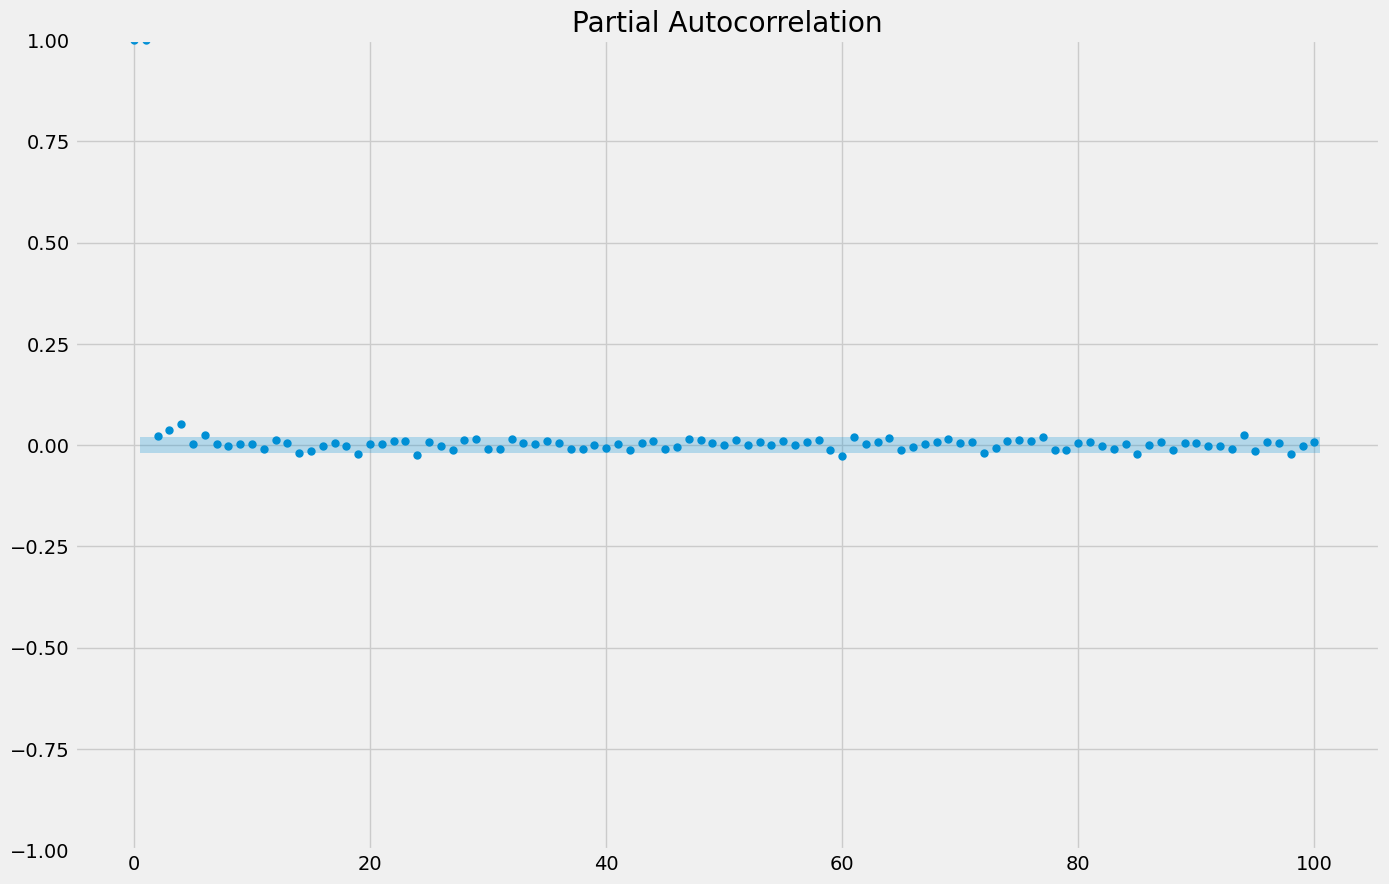

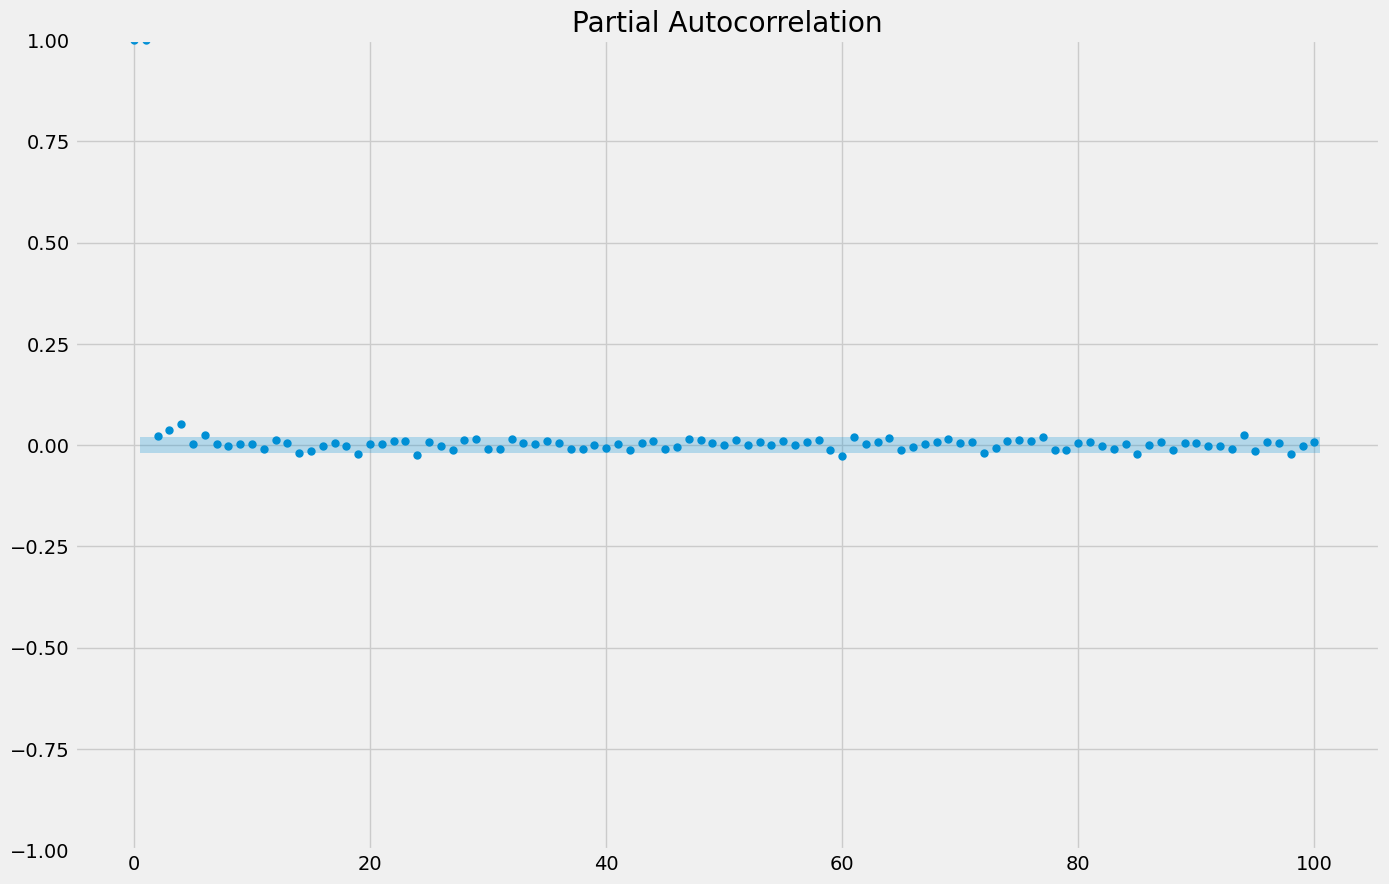

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_pacf(data['Close'], lags=100, use_vlines=False, ax=ax)

In [ ]:
def calculate_acf(series, nlags=100):
    alpha = 0.05
    acf_value, confint, qstat, pvalues, *_ = acf(series,
                                             unbiased=True,
                                             nlags=nlags,
                                             qstat=True,
                                             alpha=alpha)
    for l, p_val in enumerate(pvalues):
        if p_val > alpha:
            print("Null hypothesis is accepted at lag = {} for p-val = {}".format(l, p_val))
        else:
            print("Null hypothesis is rejected at lag = {} for p-val = {}".format(l, p_val))

In [ ]:
adf, p_value, usedlag, nobs, critical_values, *values = adfuller(data['Close'])
print ("ADF is ", adf)
print ("p value is ", p_value)
print ("lags used are ", usedlag)
print ("Number of observations are ", nobs)
print ("Critical Values are", critical_values)

ADF is  -1.8287522255977624
p value is  0.3662833073907754
lags used are  5
Number of observations are  9181
Critical Values are {'1%': -3.4310624637058607, '5%': -2.861854863483807, '10%': -2.566937596771371}


# Implementing Time Series forecasting with Prophet

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True,format='%Y-%m-%d')

In [ ]:
dat  = data[["Date", "Volume"]]

In [ ]:
dat.rename(columns={'Date':'ds','Volume':'y'},inplace=True)

In [ ]:
model = Prophet()
model.fit(dat)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptw45r5q3/oe4eglne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptw45r5q3/6awopbjb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47151', 'data', 'file=/tmp/tmptw45r5q3/oe4eglne.json', 'init=/tmp/tmptw45r5q3/6awopbjb.json', 'output', 'file=/tmp/tmptw45r5q3/prophet_modelkc8z9avt/prophet_model-20240921123939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=0, freq='M')
future.tail()

ds
9182 2024-04-12
9183 2024-04-15
9184 2024-04-16
9185 2024-04-17
9186 2024-04-18

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
9182 2024-04-12  2.762744e+07 -6.542181e+06  5.764439e+07
9183 2024-04-15  2.039075e+07 -1.067032e+07  5.311140e+07
9184 2024-04-16  2.489648e+07 -7.522795e+06  5.697642e+07
9185 2024-04-17  2.528224e+07 -5.190488e+06  5.625948e+07
9186 2024-04-18  2.464758e+07 -5.872406e+06  5.679001e+07

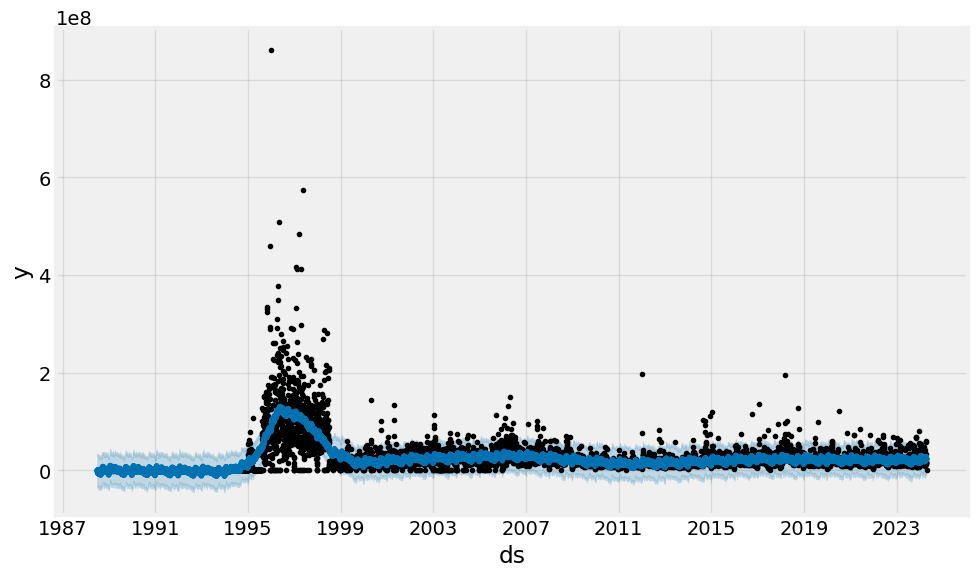

In [ ]:
fig1 = model.plot(forecast)

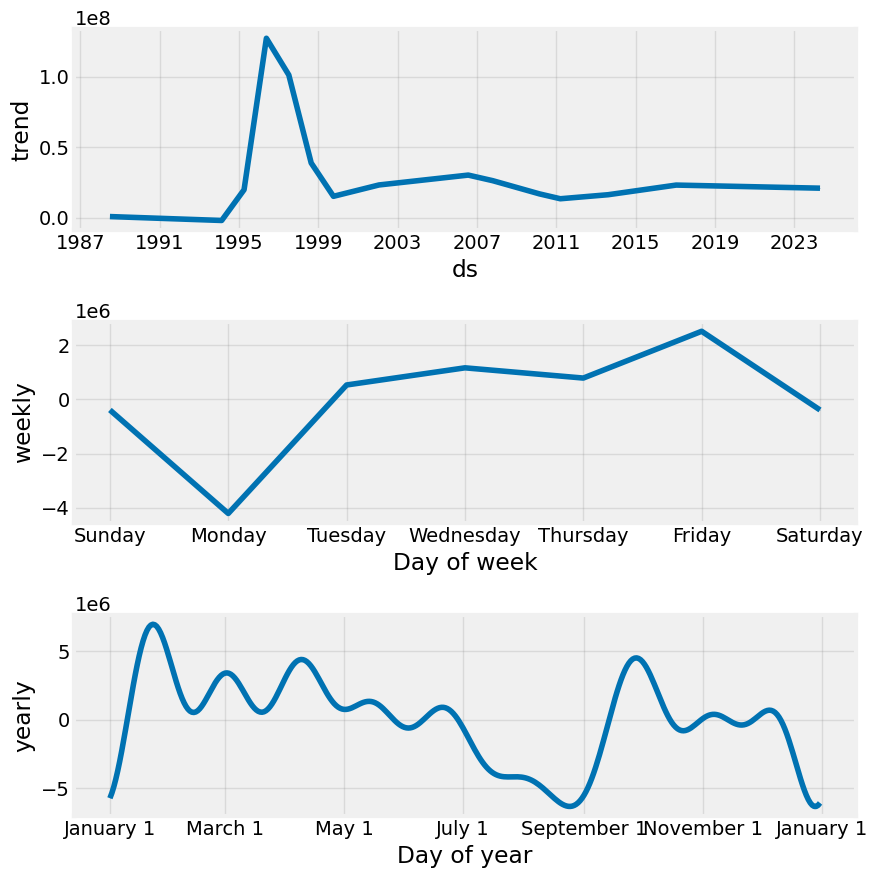

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)